In [163]:
import itertools
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/BLOSUM50'
BLOSUM50 = np.loadtxt(file_path, dtype=int, comments='#', skiprows=7)#, delimiter=' \n', ndmin = 2)
print(BLOSUM50)

[[ 5 -2 -1 -2 -1 -1 -1  0 -2 -1 -2 -1 -1 -3 -1  1  0 -3 -2  0 -2 -1 -1 -5]
 [-2  7 -1 -2 -4  1  0 -3  0 -4 -3  3 -2 -3 -3 -1 -1 -3 -1 -3 -1  0 -1 -5]
 [-1 -1  7  2 -2  0  0  0  1 -3 -4  0 -2 -4 -2  1  0 -4 -2 -3  4  0 -1 -5]
 [-2 -2  2  8 -4  0  2 -1 -1 -4 -4 -1 -4 -5 -1  0 -1 -5 -3 -4  5  1 -1 -5]
 [-1 -4 -2 -4 13 -3 -3 -3 -3 -2 -2 -3 -2 -2 -4 -1 -1 -5 -3 -1 -3 -3 -2 -5]
 [-1  1  0  0 -3  7  2 -2  1 -3 -2  2  0 -4 -1  0 -1 -1 -1 -3  0  4 -1 -5]
 [-1  0  0  2 -3  2  6 -3  0 -4 -3  1 -2 -3 -1 -1 -1 -3 -2 -3  1  5 -1 -5]
 [ 0 -3  0 -1 -3 -2 -3  8 -2 -4 -4 -2 -3 -4 -2  0 -2 -3 -3 -4 -1 -2 -2 -5]
 [-2  0  1 -1 -3  1  0 -2 10 -4 -3  0 -1 -1 -2 -1 -2 -3  2 -4  0  0 -1 -5]
 [-1 -4 -3 -4 -2 -3 -4 -4 -4  5  2 -3  2  0 -3 -3 -1 -3 -1  4 -4 -3 -1 -5]
 [-2 -3 -4 -4 -2 -2 -3 -4 -3  2  5 -3  3  1 -4 -3 -1 -2 -1  1 -4 -3 -1 -5]
 [-1  3  0 -1 -3  2  1 -2  0 -3 -3  6 -2 -4 -1  0 -1 -3 -2 -3  0  1 -1 -5]
 [-1 -2 -2 -4 -2  0 -2 -3 -1  2  3 -2  7  0 -3 -2 -1 -1  0  1 -3 -1 -1 -5]
 [-3 -3 -4 -5 -2 -4 -3 -4

In [3]:
sequence_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/sequences/prot-0004.fa'
with open (sequence_path, "r") as file:
    seq_1=file.read()
    seq_1 = seq_1[seq_1.find("\n")+1:].replace('\n', '')
print(seq_1)

SLEAAQKSNVTSSWAKASAAWGTAGPEFFMALFDAHDDVFAKFSGLFSGAAKGTVKNTPEMAAQAQSFKGLVSNWVDNLDNAGALEGQCKTFAANHKARGISAGQLEAAFKVLSGFMKSYGGDEGAWTAVAGALMGEIEPDM


In [4]:
sequence_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/sequences/prot-0008.fa'
with open (sequence_path, "r") as file:
    seq_2=file.read()
    seq_2 = seq_2[seq_2.find("\n")+1:].replace('\n', '')
print(seq_2)

ANKTRELCMKSLEHAKVDTSNEARQDGIDLYKHMFENYPPLRKYFKSREEYTAEDVQNDPFFAKQGQKILLACHVLCATYDDRETFNAYTRELLDRHARDHVHMPPEVWTDFWKLFEEYLGKKTTLDEPTKQAWHEIGREFAKEINK


In [5]:
print(len(seq_1))
print(len(seq_2))
print(BLOSUM50.shape)

142
147
(24, 24)


In [ ]:
# AA_list = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", 
#            "M", "F", "P", "S", "T", "W", "Y", "V", "B", "Z", "X", "x"]

# similarity_matrix_index = {}
# for i, aa in enumerate(AA_list):
#     similarity_matrix_index[aa] = i


In [6]:
def load_sim_matrix(name):
    pathway = os.path.join('.', name) #on Github, needs to be changed to '..'
    if name == 'BLOSUM50' or name == 'BLOSUM62':
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=7)
    elif name == 'MATIO':
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=3)
    else:
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=10)
        
    AA_list = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", 
           "M", "F", "P", "S", "T", "W", "Y", "V", "B", "Z", "X", "x"]
    similarity_matrix_index = {}
    for i, aa in enumerate(AA_list):
        similarity_matrix_index[aa] = i
    
    return sim_matrix, similarity_matrix_index
    

In [14]:
BLOSUM50, BLOSUM50_i = load_sim_matrix("BLOSUM50")

In [ ]:
print(load_sim_matrix("MATIO"))

In [7]:
PAM250, PAM250_index = load_sim_matrix("PAM250")

In [10]:
def matrix(a, b, match_score_similarity_matrix, similarity_matrix_index, gap_cost): #could not figure out implementation of elimination cost
    H = np.zeros((len(a) + 1, len(b) + 1), np.int)

    for i, j in itertools.product(range(1, H.shape[0]), range(1, H.shape[1])):
        match = H[i - 1, j - 1] + match_score_similarity_matrix[similarity_matrix_index[a[i-1]], similarity_matrix_index[b[j-1]]]
        delete = H[i - 1, j] - gap_cost
        insert = H[i, j - 1] - gap_cost
        H[i, j] = max(match, delete, insert, 0)
    return H

In [15]:
matrix('ARN','ARN',BLOSUM50, BLOSUM50_i, 2)

array([[ 0,  0,  0,  0],
       [ 0,  5,  3,  1],
       [ 0,  3, 12, 10],
       [ 0,  1, 10, 19]])

In [18]:
score_matrix = matrix(seq_1, seq_2, BLOSUM50, BLOSUM50_i, 2)
print(score_matrix)

[[  0   0   0 ...   0   0   0]
 [  0   1   1 ...   0   1   0]
 [  0   0   0 ...   2   0   0]
 ...
 [  0   0   0 ... 180 182 183]
 [  0   0   2 ... 178 182 181]
 [  0   0   0 ... 178 180 180]]


In [19]:
score_matrix = matrix(seq_1, seq_2, PAM250, PAM250_index, 2)
print(score_matrix)

[[  0   0   0 ...   0   0   0]
 [  0   1   1 ...   0   1   0]
 [  0   0   0 ...   2   0   0]
 ...
 [  0   1   0 ... 152 155 156]
 [  0   0   3 ... 150 154 155]
 [  0   0   1 ... 153 152 154]]


In [21]:
def traceback(H, b, b_='', old_i=0):
    maximum = H.max()
    # flip H to get index of **last** occurrence of H.max() with np.argmax()
    H_flip = np.flip(np.flip(H, 0), 1)
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  # (i, j) are **last** indexes of H.max()
    if H[i, j] == 0: #terminating condition
        return b_, j
    b_ = b[j - 1] + '-' + b_ if old_i - i > 1 else b[j - 1] + b_ #True: add gap to sequence; otherwise, add AA
    return traceback(H[0:i, 0:j], b, b_, i)

In [190]:
string, number = traceback(score_matrix, seq_2)

In [191]:
len(string)

29

In [23]:
def score(H):
    return H.max()

In [24]:
score(score_matrix)

157

In [ ]:
s.strip()

In [ ]:
for f in neg_pairs_filelist:
    a, b = return_sequences(*f)
    

Here I am doing the ROC stuff after implementing S-WM above.

In [25]:
def return_sequences(sequence_a_path, sequence_b_path):
    with open (sequence_a_path, "r") as file:
        a = file.read()
        a = a[a.find("\n")+1:].replace('\n', '')
    with open (sequence_b_path, "r") as file:
        b = file.read()
        b = b[b.find("\n")+1:].replace('\n', '')
    return a, b

In [27]:
BLOSUM50, BLOSUM50_i = load_sim_matrix('BLOSUM50')

In [28]:
neg_pairs_filelist = []
with open('./Negpairs.txt', mode='r') as my_file:
    for line in my_file:
        neg_pairs_filelist.append(line.strip().split(' '))

In [29]:
a, b = return_sequences(*neg_pairs_filelist[0])

In [30]:
print(a)
print(b)

SQAEFDKAAEEVKHLKTKPADEEMLFIYSHYKQATVGDINTERPGMLDFKGKAKWDAWNELKGTSKEDAMKAYIDKVEELKKKYGI
AVSLDRTRAVFDGSEKSMTLDISNDNKQLPYLAQAWIENENQEKIITGPVIATPPVQRLDPGAKSMVRLSTTPDISKLPQDRESLFYFNLREIPPRSEKANVLQIALQTKIKLFYRPAA


In [31]:
neg_pairs_scores = []
for f in neg_pairs_filelist:
    #print(f)
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, gap_cost=2)
    neg_pairs_scores.append(score(score_matrix))

In [32]:
neg_pairs_scores

[118,
 100,
 64,
 221,
 106,
 128,
 228,
 49,
 117,
 55,
 225,
 71,
 136,
 260,
 162,
 161,
 117,
 80,
 59,
 305,
 320,
 112,
 113,
 276,
 284,
 112,
 198,
 208,
 319,
 135,
 369,
 219,
 168,
 146,
 103,
 120,
 72,
 179,
 127,
 90,
 55,
 77,
 221,
 190,
 313,
 90,
 86,
 41,
 71,
 140]

In [33]:
pos_pairs_filelist = []
with open('./Pospairs.txt', mode='r') as my_file:
    for line in my_file:
        pos_pairs_filelist.append(line.strip().split(' '))

In [104]:
pos_pairs_scores = []
for f in pos_pairs_filelist:
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, gap_cost=5)
    pos_pairs_scores.append(score(score_matrix))
pos_pairs_scores = np.array(pos_pairs_scores)
print(pos_pairs_scores)

[ 77  89  77 112 118  41 160  50  57  61  84  70 134  91 144  90  81 167
 105 150 151 120 115 117 117  69 137 113  73  70  90 103 100 103 121  74
 106  93  93  51  61  71  61 154 196  84 146 389  92  85]


In [150]:
def return_threshold(similarity_matrix, gap_cost, goal_TPR):
    pos_pairs_scores = []
    for f in pos_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, gap_cost)
        pos_pairs_scores.append(score(score_matrix))
    pos_pairs_scores = np.array(pos_pairs_scores)
    threshold = np.sort(pos_pairs_scores)[int(49 * (1 - goal_TPR))]
    return threshold

In [153]:
t = return_threshold(BLOSUM50, 5, 0.7)
t

77

In [154]:
#checking I do get a TPR of 0.7
(np.array(pos_pairs_scores) > t).mean()

0.7

In [106]:
find_FPR(t, BLOSUM50, 5)

0.3

In [94]:
t = return_threshold(BLOSUM50, 2, 0.4)
(np.array(pos_pairs_scores) > t).mean()

0.4

In [110]:
def find_FPR(threshold, similarity_matrix, gap_cost):
    neg_pairs_scores = []
    for f in neg_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, gap_cost) #note all similarity matrix indices are the same
        neg_pairs_scores.append(score(score_matrix))
    FPR = (np.array(neg_pairs_scores) > threshold).mean()
    return FPR
    

In [111]:
FPR_list = []
for gap_cost in range(1,6):
    threshold = return_threshold(BLOSUM50, gap_cost, 0.7)
    FPR = find_FPR(threshold, BLOSUM50, gap_cost)
    FPR_list.append(FPR)
print(FPR_list)  

[0.38, 0.34, 0.32, 0.28, 0.3]


The lowest FPR was 0.28, which corresponds to a gap cost of 4. I was unable to try different gap penalty combinations because I couldn't figure out how to differentiate between gap openings and extension penalties in my code.

Next, I will try finding the FPR for each matrix with a gap cost of 4.

In [112]:
BLOSUM50, similarity_matrix_index = load_sim_matrix('BLOSUM50')
BLOSUM62, similarity_matrix_index = load_sim_matrix('BLOSUM62')
MATIO, similarity_matrix_index = load_sim_matrix('MATIO')
PAM100, similarity_matrix_index = load_sim_matrix('PAM100')
PAM250, similarity_matrix_index = load_sim_matrix('PAM250')

In [155]:
FPR_list_matrix = []
for sim_matrix in [BLOSUM50, BLOSUM62, MATIO, PAM100, PAM250]:
    threshold = return_threshold(sim_matrix, 4, 0.7)
    FPR = find_FPR(threshold, sim_matrix, 4)
    FPR_list_matrix.append(FPR)
print(FPR_list_matrix)

[0.28, 0.16, 0.36, 0.28, 0.28]


With the best gap penalty combination, BLOSUM62 appeared to perform the best (i.e. had the lowest FPR with a TPR of 0.7).
    
BLOSUM50 had a FPR of 0.28.

BLOSUM62 had a FPR of 0.16.

MATIO had a FPR of 0.36 (i.e. every single negative pair was considered positive!)

PAM100 had a FPR of 0.28.

PAM250 had a FPR of 0.28.

In [65]:
#ROC Curves

In [66]:
ROC_TPR = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [156]:
#BLOSUM50
BLOSUM50_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(BLOSUM50, 4, goal_TPR)
    FPR = find_FPR(threshold, BLOSUM50, 4)
    BLOSUM50_FPR.append(FPR) 
print(BLOSUM50_FPR)

[0.0, 0.0, 0.02, 0.08, 0.12, 0.16, 0.26, 0.28, 0.32, 0.54, 0.78]


In [157]:
#BLOSUM62
BLOSUM62_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(BLOSUM62, 4, goal_TPR)
    FPR = find_FPR(threshold, BLOSUM62, 4)
    BLOSUM62_FPR.append(FPR) 
print(BLOSUM62_FPR)

[0.0, 0.0, 0.0, 0.02, 0.04, 0.08, 0.12, 0.16, 0.36, 0.44, 0.74]


In [158]:
#MATIO
MATIO_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(MATIO, 4, goal_TPR)
    FPR = find_FPR(threshold, MATIO, 4)
    MATIO_FPR.append(FPR) 
print(MATIO_FPR)

[0.0, 0.0, 0.08, 0.12, 0.22, 0.24, 0.34, 0.36, 0.44, 0.68, 0.94]


In [159]:
#PAM100
PAM100_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(PAM100, 4, goal_TPR)
    FPR = find_FPR(threshold, PAM100, 4)
    PAM100_FPR.append(FPR) 
print(PAM100_FPR)

[0.0, 0.0, 0.0, 0.0, 0.02, 0.1, 0.22, 0.28, 0.32, 0.34, 0.58]


In [160]:
#PAM250
PAM250_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(PAM250, 4, goal_TPR)
    FPR = find_FPR(threshold, PAM250, 4)
    PAM250_FPR.append(FPR) 
print(PAM250_FPR)

[0.0, 0.0, 0.02, 0.08, 0.14, 0.2, 0.26, 0.28, 0.3, 0.46, 0.86]


<Figure size 360x360 with 0 Axes>

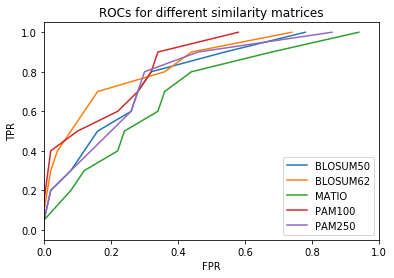

<Figure size 360x360 with 0 Axes>

In [187]:
sns.lineplot(x=BLOSUM50_FPR, y=ROC_TPR, label="BLOSUM50")
sns.lineplot(x=BLOSUM62_FPR, y=ROC_TPR, label="BLOSUM62")
sns.lineplot(x=MATIO_FPR, y=ROC_TPR, label="MATIO")
sns.lineplot(x=PAM100_FPR, y=ROC_TPR, label="PAM100")
sns.lineplot(x=PAM250_FPR, y=ROC_TPR, label="PAM250")
plt.title("ROCs for different similarity matrices")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.xlim(0,1)
#plt.axis('equal')
plt.figure(figsize=(5,5))

I am now writing new functions and remaking ROC curves to address Part 1, Q3 about normalization.

In [199]:
def normalized_threshold(similarity_matrix, gap_cost, goal_TPR):
    pos_pairs_scores = []
    for f in pos_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, gap_cost)
        pos_pairs_scores.append(normalized_score(score_matrix, a, b))
    pos_pairs_scores = np.array(pos_pairs_scores)
    threshold = np.sort(pos_pairs_scores)[int(49 * (1 - goal_TPR))]
    return threshold

In [194]:
def normalized_score(H,a,b):
    return H.max()/min(len(a), len(b))

In [197]:
def normalized_FPR(threshold, similarity_matrix, gap_cost):
    neg_pairs_scores = []
    for f in neg_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, gap_cost) #note all similarity matrix indices are the same
        neg_pairs_scores.append(normalized_score(score_matrix, a, b))
    FPR = (np.array(neg_pairs_scores) > threshold).mean()
    return FPR

In [200]:
#BLOSUM62 with normalized scores
BLOSUM62_FPR_norm = []
for goal_TPR in ROC_TPR:
    threshold = normalized_threshold(BLOSUM62, 4, goal_TPR)
    FPR = normalized_FPR(threshold, BLOSUM62, 4)
    BLOSUM62_FPR_norm.append(FPR) 
print(BLOSUM62_FPR_norm)

[0.0, 0.02, 0.16, 0.26, 0.36, 0.58, 0.64, 0.72, 0.82, 0.86, 0.92]


<Figure size 1440x1440 with 0 Axes>

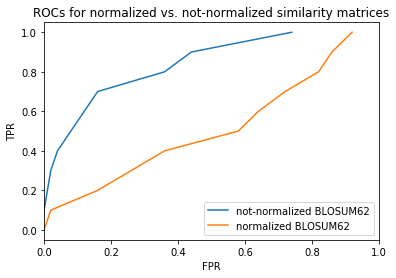

<Figure size 1440x1440 with 0 Axes>

In [202]:
sns.lineplot(x=BLOSUM62_FPR, y=ROC_TPR, label="not-normalized BLOSUM62")
sns.lineplot(x=BLOSUM62_FPR_norm, y=ROC_TPR, label="normalized BLOSUM62")
plt.title("ROCs for normalized vs. not-normalized similarity matrices")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.xlim(0,1)
#plt.axis('equal')
plt.figure(figsize=(20,20))

The performance appears to get worse if we normalize the Smith-Waterman scores.

Looking at the ROC curve particularly, the normalized BLOSUM62 appears to have the same performance as a random algorithm. The false positive rates indeed are much higher (and thus worse) for the normalized rather than the non-normalized. This may occur because you'd generally expect it to be harder to get good sequence alignments from very short sequences. By taking away the "penalty" or differntatiation for having a short sequence, your algorithm is going to perform much worse.

https://web.stanford.edu/class/cs262/presentations/lecture2.pdf
https://github.com/applied-bioinformatics/An-Introduction-To-Applied-Bioinformatics/blob/master/book/fundamentals/pairwise-alignment.md